 ## Лабораторная работа 2

# Вариационные методы решения краевых задач.

## Задание:

### Методами коллокаций, интегральным и дискретным методами наименьших квадратов и Галеркина получить численное решение краевой задачи:

### 1. $y'' + (1 + x^2) \cdot y = -1, $  

  $-1 \leq x \leq 1$
  
  
### 2. $a\cdot y'' + (1 + b\cdot x^2)\cdot y = -1,$

   $-1 \leq x \leq 1$,
   
   где $a = sin(k), b = cos(k)$.


### Краевые условия для обеих задач:

$y(-1) = 0$

$y(1) = 0$

### 1. Решение краевых задач вариационными методами.

Приближенное решение краевой задачи можно получить в виде линейной комбинации базисных функций:

$y_n(x) = a_0 \cdot \varphi_0(x) + a_1\cdot \varphi_1(x) + ... + a_n \cdot \varphi_n(x)$

В нашем случае базисная функция имеет следующий вид:

$\varphi_i(x) = x^i \cdot (1 - x^2)$

Таким образом, для нахождения решения необходимо найти коэффициенты $a$ такие, чтобы функция $y_n(x)$ удовлетворяла граничному условию и была максимально близко к точному решению, для чего используется невязка функции.

Невязка функции имеет следующий вид:

$\psi(x, a_1, ..., a_n) = y''_n(x) + p(x)  \cdot y'_n(x) + q(x) \cdot y_n(x) - f(x) $

Очевидно, она должна быть минимальной для максимального приближения к точному решению краевой задачи.

Представим $y_n(x), y'_n(x), y''_n(x)$ как линейные комбинации базисных функций:

$y_n(x) = a_0 \cdot \varphi_0(x) + a_1\cdot \varphi_1(x) + ... + a_n \cdot \varphi_n(x) = \sum_{i=0}^n a_i \cdot x^i(1 - x^2) = \sum_{i=0}^n a_i \cdot (x^i - x^{i+2}) $

$y'_n(x) =  \sum_{i=1}^n a_i \cdot (i \cdot x^{i-1} - (i+2) \cdot x^{i+1}) - 2 \cdot x \cdot a_0$

$y''_n(x) =  \sum_{i=2}^n a_i \cdot (i \cdot (i-1) \cdot x^{i-2} - (i+2)\cdot (i+1) \cdot x^i) - 2 \cdot a_0 - 6\cdot a_1 \cdot x $

Тогда можно выразить невязку следующим образом:

$\psi(x, a_0, ... , a_n) =  \sum_{i=2}^n a_i \cdot (i \cdot (i-1) \cdot x^{i-2} - (i+2)\cdot (i+1) \cdot x^i) - 2 \cdot a_0 - 6\cdot a_1 \cdot x + p(x) \cdot (\sum_{i=1}^n a_i \cdot (i \cdot x^{i-1} - (i+2) \cdot x^{i+1}) - 2 \cdot x \cdot a_0) + q(x)\cdot (\sum_{i=0}^n a_i \cdot x^i(1 - x^2) = \sum_{i=0}^n a_i \cdot (x^i - x^{i+2})) - f(x) =
a_0 \cdot (-2 - p(x) \cdot 2 \cdot x + q(x) \cdot (1 - x^2)) + a_1 \cdot (-6\cdot x + p(x)\cdot (1 - 3\cdot x^2) + q(x) \cdot (x - x^3)) + \sum_{i=2}^n a_i  \cdot (i\cdot (i-1)\cdot x^{i-2} - (i+2)\cdot (i+1) \cdot x^i + p(x) \cdot (i\cdot x^{i-1} - (i+2)\cdot (i+2)\cdot x^{i+1})+ q(x) \cdot (x^i - x^{i+2})) - f(x) $

 Следовательно, коэффициенты при $a_i$  можно записать так:
 $coefficient_i = \begin{cases} -2 - p(x) \cdot 2 \cdot x + q(x) \cdot (1 - x^2), & \mbox{if } i = 0  \\ -6\cdot x + p(x)\cdot (1 - 3\cdot x^2) + q(x) \cdot (x - x^3), & \mbox{if } i = 1 \\ i\cdot (i-1)\cdot x^{i-2} - (i+2)\cdot (i+1) \cdot x^i + p(x) \cdot (i\cdot x^{i-1} - (i+2)\cdot (i+2)\cdot x^{i+1})+ q(x) \cdot (x^i - x^{i+2}), & \mbox{if } i \geq 2\end{cases}$

Это удобно использовать для вычислений при решении краевых задач вариационными методами.

### 2. Задание граничных условий и параметра k.

In [2]:
import numpy as np
import math
import sympy as sp
import time

In [3]:
a = -1
b = 1
k = 1

### 3. Задание функций p_u, g, u, f, p, $\varphi$ (параметр task определяет выполняемое задание и определяет функции в соответствии с ним):


In [25]:
def p_u(x):
    return 0


def g(x, task):
    if task:
        return math.sin(k)
    else:
        return 1


def u(x, task):
    if task:
        return math.cos(k)
    else:
        return 1


def f(x, task):
    return -1 / g(x, task)


def p(x, task):
    return 1 + x * x * u(x, task) / g(x, task)


def phi(x, i):
    return (1 - x**2) * x**i

### 4. Задание функции для определения коэффициента при $a_i$:

In [35]:
def coefficient_element(j, x, task):
    if j == 0:
        return -2 - 2 * x * p_u(x) + (1 - x ** 2) * p(x, task)
    elif j == 1:
        return -6 * x + (1 - 3 * x ** 2) * p_u(x) + (x - x ** 3) * p(x, task)
    else:
        return j * (j - 1) * x ** (j - 2) - (j + 1) * (j + 2) * x ** j + \
                     (j * x ** (j - 1) - (j + 2) * x ** (j + 1)) * p_u(x) \
                     + (x ** j - x ** (j + 2)) * p(x, task)

### 5. Задание функции для нахождения значений $a_i$ посредством решения системы и последующего вычисления  $y$ и рисования графика:

In [11]:
def find_n_show_solution(C, F):
    C = np.array(C)
    F = np.array(F)
    solution = np.linalg.solve(C, F)
    x = sp.symbols('x')
    y = sum(solution[i] * (x ** i * (1 - x ** 2)) for i in range(n))
    print("Ymax = ", y.subs({x: 0}))
    sp.plotting.plot(y, (x, a, b))

## 1. Метод коллокаций

#### В рамках метода коллокаций выполняются следующие действия:
1. На отрезке $[a, b]$ выбираются точки $x_1, x_2, ... , x_m \in [a, b]$,  $(m \geq n)$ - точки коллокации. 
2. Точки последовательно подставляются в невязку, и, считая, что невязка должна быть нулю в точках коллокации, получаем систему уравнений для определения коэффициентов $a_1, ... , a_n$:

    $\begin{cases} \psi(x_1, a_0, ... , a_n) = 0 \\ .....\\ \psi(x_n, a_0, ... , a_n) = 0\end{cases}$
    
    При этом в первом пункте было показано, что:
    
    $\psi(x, a_0, ... , a_n) =
a_0 \cdot (-2 - p(x) \cdot 2 \cdot x + q(x) \cdot (1 - x^2)) + a_1 \cdot (-6\cdot x + p(x)\cdot (1 - 3\cdot x^2) + q(x) \cdot (x - x^3)) + \sum_{i=2}^n a_i  \cdot (i\cdot (i-1)\cdot x^{i-2} - (i+2)\cdot (i+1) \cdot x^i + p(x) \cdot (i\cdot x^{i-1} - (i+2)\cdot (i+2)\cdot x^{i+1})+ q(x) \cdot (x^i - x^{i+2})) - f(x) $


    Тогда система принимает вид: 
    
   $\begin{cases}\ a_0 \cdot (-2 - p(x_1) \cdot 2 \cdot x_1 + q(x_1) \cdot (1 - x_1^2)) + a_1 \cdot (-6\cdot x_1 + p(x_1)\cdot (1 - 3\cdot x_1^2) + q(x_1) \cdot (x_1 - x_1^3)) + \sum_{i=2}^n a_i  \cdot (i\cdot (i-1)\cdot x_1^{i-2} - (i+2)\cdot (i+1) \cdot x_1^i + p(x_1) \cdot (i\cdot x_1^{i-1} - (i+2)\cdot (i+2)\cdot x_1^{i+1})+ q(x_1) \cdot (x_1^i - x_1^{i+2})) = f(x_1) \\ ................................................\\ a_0 \cdot (-2 - p(x_n) \cdot 2 \cdot x_n + q(x_n) \cdot (1 - x_n^2)) + a_1 \cdot (-6\cdot x_n + p(x_n)\cdot (1 - 3\cdot x_n^2) + q(x_n) \cdot (x_n - x_n^3)) + \sum_{i=2}^n a_i  \cdot (i\cdot (i-1)\cdot x_n^{i-2} - (i+2)\cdot (i+1) \cdot x_n^i + p(x_n) \cdot (i\cdot x_n^{i-1} - (i+2)\cdot (i+2)\cdot x_n^{i+1})+ q(x_n) \cdot (x_n^i - x_n^{i+2})) = f(x_n)\end{cases}$
 
 
  $\begin{cases}\ \sum_{k=0}^n coefficient_k(x_1)\cdot a_k = f(x_1) \\ .....................................\\ \sum_{k=0}^n coefficient_k(x_n)\cdot a_k = f(x_n)\end{cases}$

   Учитывая это, понятно, что в точке х при $a_i$ будет коэффициент $coefficient_𝑗(𝑥_𝑖)$, а компонента вектора свободных членов - $𝑓(𝑥_𝑖)$.
3. Находим решение полученной системы уравнений, что позволяет найти и y.

In [34]:
n = 100          # количество точек коллокации

In [13]:
def collocation_method(task=False):
    X = np.array([i*(b-a)/(n-1) + a for i in range(n)])
    f_x = [f(x, task) for x in X]
    coef = [[0] * n for _ in range(n)]
    for i in range(n):
        for j in range(n):
            coef[i][j] = coefficient_element(j, X[i], task)
    find_n_show_solution(coef, f_x)

### Задание 1.

Ymax =  0.932053718324819


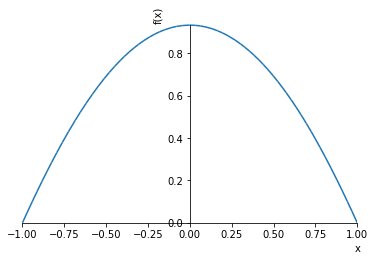

In [14]:
collocation_method()

### Задание 2.

Ymax =  1.07078487764158


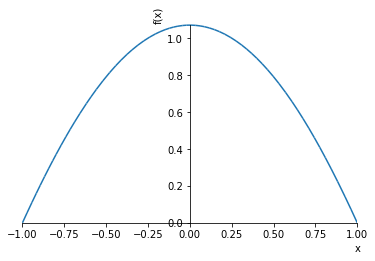

In [15]:
collocation_method(True)

## 2. Метод наименьших квадратов (интегральный)

Приближенное решение также строится по базисной системе. 

Для нахождения коэффициентов при базисных функций минимизируется интеграл от квадрата невязки:

$I = \int_{a}^{b} \psi^2(x, a_0, a_1, ... , a_n) dx$

Для нахождения минимума интеграла вычисляются первые производные интеграла по параметрам и приравниваются нулю, в результате чего получается система следующего вида, в результате решения которой будут получены значения коэффициентов: 

 $\begin{cases} \dfrac {\partial I}{\partial a_1} = 2 \cdot \int_{a}^{b} \psi(x, a_0, ..., a_n) \cdot \dfrac {\partial \psi(x, a_0, ..., a_n)}{\partial a_1} \\ ..........  \\ \dfrac {\partial I}{\partial a_n} = 2 \cdot \int_{a}^{b} \psi(x, a_0, ..., a_n) \cdot \dfrac {\partial \psi(x, a_0, ..., a_n)}{\partial a_n}\end{cases}$
 
Для того, чтобы интеграл был минимальным, для всех $i = 0, ..., n$ выполняется равенство:

$\dfrac {\partial I}{\partial a_i} = 0$

Можно заметить, что $\dfrac {\partial \psi(x, a_0, ..., a_n)}{\partial a_i} = coefficient_i(x)$ (в соответствии с формулами, выведенными в пункте 1).

Распишем уравнение системы для некоторого $a_i$, то есть рассмотрим i-ю строку системы:

$2 \cdot \int_{a}^{b} \psi(x, a_0, ..., a_n) \cdot \dfrac {\partial \psi(x, a_0, ..., a_n)}{\partial a_i} = 0$

$\int_{a}^{b} \psi(x, a_0, ..., a_n) \cdot coefficient_i(x) = 0$

$\int_{a}^{b} (\sum_{k=0}^n coefficient_k(x)\cdot a_k - 𝑓(𝑥))\cdot coefficient_i(x) = 0$

$\sum_{k=0}^n a_k\cdot \int_{a}^{b} coefficient_i(x)\cdot coefficient_k(x) = \int_{a}^{b}  𝑓(𝑥)\cdot coefficient_i(x)$
 
Учитывая это, понятно, что в уравнении i данной системы при $a_k$ будет стоять коэффициент $\int_{a}^{b} coefficient_i(𝑥)\cdot coefficient_k(𝑥) dx$, а компонента вектора свободных членов - $\int_{a}^{b} 𝑓(𝑥)\cdot coefficient_i(𝑥) dx$.

Определим функции для получения коэффициента при $a_j$ и соответствующей компоненты вектора свободных членов (до интегрирования):

In [32]:
def f_iLSN(x, i, task):
    return f(x, task) * coefficient_element(i, x, task)


def coefficient_iLSN(x, i, j, task):
    return coefficient_element(i, x, task) * coefficient_element(j, x, task)

Для вычисления определенного интеграла используем метод прямоугольников: разобьем $[a, b]$ на равные отрезки в количестве integral_dimension и найдем площади прямоугольников, одна из сторон которых лежит на оси Ох, а противоположная – пересекает график подынтегральной функции, что поможет получить приближенное значение определенного интеграла.

In [33]:
def least_squares_method_integral(task=False):
    integral_dimension = 100
    x = np.linspace(a, b, integral_dimension)
    coef = [[0] * n for _ in range(n)]
    f_x = [0 for _ in range(n)]
    for i in range(n):
        f_x[i] = np.sum(f_iLSN(x, i, task)) * (b - a) / integral_dimension
        for j in range(n):
            coef[i][j] = np.sum(coefficient_iLSN(x, i, j, task)) * (b - a) / integral_dimension
    find_n_show_solution(coef, f_x)

### Задание 1.

Ymax =  0.932053714922982


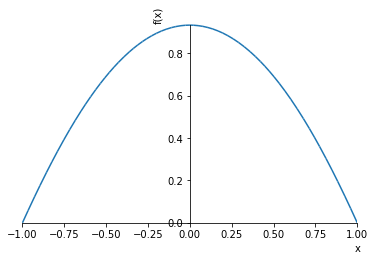

In [17]:
least_squares_method_integral()

### Задание 2.

Ymax =  1.07078487072341


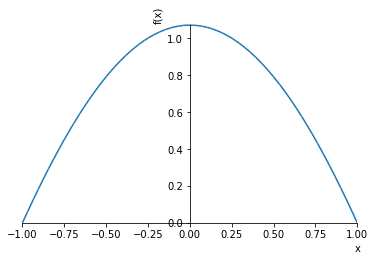

In [18]:
least_squares_method_integral(True)

## 3. Метод наименьших квадратов (дискретный)

Выбирается m > n точек и решается следующая задача: 

$S = \sum_{i=1}^m \psi^2(x_i, a_1, ..., a_n) \to min$.

Для этого строится система:

$\begin{cases} \dfrac {\partial S}{\partial a_1} = 0 \\..... \\ \dfrac {\partial S}{\partial a_n} = 0\end{cases}$

Если подставить в систему $S = \sum_{i=1}^m \psi^2(x_i, a_1, ..., a_n)$, получаем:

$\begin{cases} \dfrac {\partial \sum_{i=1}^m \psi^2(x_i, a_1, ..., a_n)}{\partial a_1} = 0 \\..... \\ \dfrac {\partial \sum_{i=1}^m \psi^2(x_i, a_1, ..., a_n)}{\partial a_n} = 0\end{cases}$

$\begin{cases} 2 \cdot \sum_{i=1}^m  \psi(x_i, a_1, ..., a_n) \cdot \dfrac {\partial \psi(x_i, a_1, ..., a_n)}{\partial a_1} = 0 \\..... \\ 2 \cdot \sum_{i=1}^m \psi(x_i, a_1, ..., a_n) \cdot \dfrac {\partial \psi(x_i, a_1, ..., a_n)}{\partial a_n} = 0\end{cases}$

И вновь можно заметить, что $\dfrac {\partial \psi(x, a_0, ..., a_n)}{\partial a_i} = coefficient_i(x)$ (в соответствии с формулами, выведенными в пункте 1).

Учитывая полученное в первом пункте выражение для $\psi(x_i, a_1, ..., a_n)$:

$\begin{cases} \sum_{i=1}^m  (\sum_{k=0}^n coefficient_k(x)\cdot a_k - 𝑓(𝑥)) \cdot coefficient_1(x) = 0 \\..... \\  \sum_{i=1}^m (\sum_{k=0}^n coefficient_k(x)\cdot a_k - 𝑓(𝑥)) \cdot coefficient_n(x) = 0\end{cases}$

$\begin{cases} \sum_{k=0}^n a_k \sum_{i=1}^m coefficient_k(x)\cdot coefficient_1(x) = \sum_{i=1}^m 𝑓(𝑥) \cdot coefficient_1(x) \\..... \\  \sum_{k=0}^n a_k \sum_{i=1}^m  coefficient_k(x)\cdot coefficient_n(x) = \sum_{i=1}^m 𝑓(𝑥) \cdot coefficient_n(x)\end{cases}$

Тогда понятно, что в уравнении i данной системы при $a_k$ будет стоять коэффициент $ \sum_{i=1}^m coefficient_i(𝑥)\cdot coefficient_k(𝑥) dx$, а компонента вектора свободных членов - $ \sum_{i=1}^m 𝑓(𝑥)\cdot coefficient_i(𝑥) dx$.

In [20]:
def least_squares_method_discrete(task=False):
    m = 120
    x = np.linspace(a, b, m)
    coef = [[0] * n for _ in range(n)]
    f_x = [0 for _ in range(n)]
    for i in range(n):
        f_x[i] = np.sum([f_iLSN(x, i, task)])
        for j in range(n):
            coef[i][j] = np.sum(coefficient_iLSN(x, i, j, task))
    find_n_show_solution(coef, f_x)

### Задание 1.

Ymax =  0.932053718656111


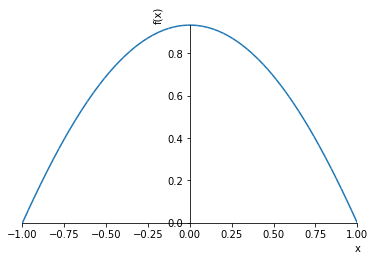

In [21]:
least_squares_method_discrete()

### Задание 2.

Ymax =  1.07078487527720


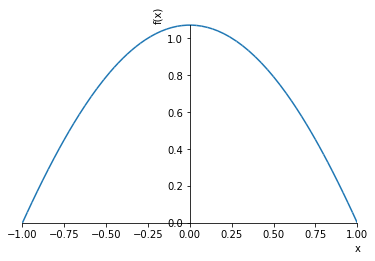

In [22]:
least_squares_method_discrete(True)

## 4. Метод Галеркина

При рассмотрении невязки $\psi(x, a_1, ..., a_n)$ строится система для определения коэффициентов при базисных функциях:

$\begin{cases} \int_{a}^{b} \psi(x, a_0, ..., a_n) \cdot \varphi_1(x) dx = 0  \\ ..........  \\ \int_{a}^{b} \psi(x, a_0, ..., a_n) \cdot \varphi_n(x) dx = 0 \end{cases}$


Учитывая полученное в первом пункте выражение для $\psi(x_i, a_1, ..., a_n)$:

$\begin{cases} \int_{a}^{b} (\sum_{k=0}^n coefficient_k(x)\cdot a_k - 𝑓(𝑥)) \cdot \varphi_1(x) dx = 0  \\ ..........  \\ \int_{a}^{b} (\sum_{k=0}^n coefficient_k(x)\cdot a_k - 𝑓(𝑥)) \cdot \varphi_n(x) dx = 0 \end{cases}$

$\begin{cases} \sum_{k=0}^n  a_k \int_{a}^{b} coefficient_k(x)\cdot \varphi_1(x) dx = \int_{a}^{b} 𝑓(𝑥) dx \cdot \varphi_1(x)  \\ ..........  \\ \sum_{k=0}^n  a_k \int_{a}^{b} coefficient_k(x)\cdot \varphi_n(x) dx = \int_{a}^{b}𝑓(𝑥) \cdot \varphi_n(x) dx \end{cases}$

Тогда в i-й строке при $a_k$ будет коэффициент $\int_{a}^{b} coefficient_k(x)\cdot \varphi_i(x) dx$, а компонента свободных членов будет равна $\int_{a}^{b}𝑓(𝑥) \cdot \varphi_i(x) dx$.

Определим функции для получения коэффициента при $a_j$ и соответствующей компоненты вектора свободных членов (до интегрирования):

In [23]:
def f_Galerkin(x, i, task):
    return f(x, task) * phi(x, i)


def coefficient_Galerkin(x, i, j, task):
    return phi(x,i) * coefficient_element(j, x, task)

Для вычисления определенного интеграла вновь используется метод прямоугольников.

In [ ]:
def Galerkin_method(task=False):
    integral_dimension = 100
    x = np.linspace(a, b, integral_dimension)
    coef = [[0] * n for _ in range(n)]
    f_x = [0 for _ in range(n)]
    for i in range(n):
        f_x[i] = np.sum(f_Galerkin(x, i, task)) * (b - a) / integral_dimension
        for j in range(n):
            coef[i][j] = np.sum(coefficient_Galerkin(x, i, j, task)) * (b - a) / integral_dimension
    find_n_show_solution(coef, f_x)

### Задание 1.

Ymax =  0.932043247433748


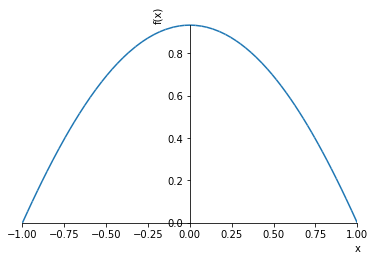

In [26]:
Galerkin_method()

### Задание 2.

Ymax =  1.07080747912026


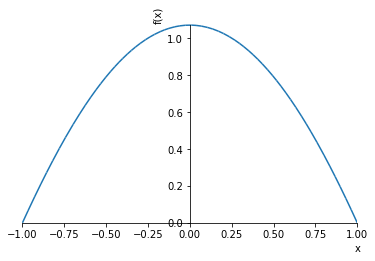

In [27]:
Galerkin_method(True)